# SNAKE AND LADDER GAME BETWEEN AI AND A HUMAN PLAYER

### This game is played between a human and an AI. The AI can be either Tree based or Neural Network based,
### note that the board sizes are variable and can be 75, 100 and 200. 

In [ ]:
#authors: Anusha Prakash
# Janani Hemachandra
# Madhura Anand

In [1]:

import time
import random
import sys
from IPython.display import HTML
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

# just of effects. add a delay of 1 second before performing any action
SLEEP_BETWEEN_ACTIONS = 1
MAX_VAL = 100
DICE_FACE = 6



player_turn_text = [
    "Your turn.",
    "Go.",
    "Please proceed.",
    "Lets win this.",
    "Are you ready?",
    "",
]

snake_bite = [
    "boohoo",
    "bummer",
    "snake bite",
    "oh no",
    "dang"
]

ladder_jump = [
    "woohoo",
    "woww",
    "nailed it",
    "oh my God...",
    "yaayyy"
]


In [2]:
# snake takes you down from 'key' to 'value' for board size 100
snakes_100 = {
    8: 4,
    18: 1,
    26: 10,
    39: 5,
    51: 6,
    54: 36,
    56: 1,
    60: 23,
    75: 28,
    83: 45,
    85: 59,
    90: 48,
    92: 25,
    97: 87,
    99: 63
}

# ladder takes you up from 'key' to 'value'
ladders_100 = {
    3: 20,
    6: 14,
    11: 28,
    15: 34,
    17: 74,
    22: 37,
    38: 59,
    49: 67,
    57: 76,
    61: 78,
    73: 86,
    81: 98,
    88: 91
}

In [3]:
# snake takes you down from 'key' to 'value' for board size 75
snakes_75 = {
    8: 4,
    18: 1,
    26: 10,
    39: 5,
    51: 6,
    54: 36,
    56: 1,
    65: 21,
    70: 45
}

# ladder takes you up from 'key' to 'value'
ladders_75 = {
    3: 20,
    6: 14,
    11: 28,
    15: 34,
    17: 74,
    22: 37,
    38: 59,
    49: 67,
    57: 76,
    61: 70
}

In [4]:
# snake takes you down from 'key' to 'value' for board size 200
snakes_200 = {
    8: 4,
    18: 1,
    26: 10,
    39: 5,
    51: 6,
    54: 36,
    56: 1,
    60: 23,
    75: 28,
    83: 45,
    85: 59,
    90: 48,
    92: 25,
    97: 87,
    99: 63,
    120:76,
    134:65,
    150:110,
    180: 150,
    190: 176
}

# ladder takes you up from 'key' to 'value'
ladders_200 = {
    3: 20,
    6: 14,
    11: 28,
    15: 34,
    17: 74,
    22: 37,
    38: 59,
    49: 67,
    57: 76,
    61: 78,
    73: 86,
    81: 98,
    88: 91,
    99:120,
    145:180,
    170:190,
    189:192
}

In [5]:
class Node:
    def __init__(self,value):
        self.value = value;
        self.left = None
        self.right = None

### Intialize Nodes to None

In [6]:
def newNode(v):
    
    temp = Node(v)
    return temp

### Getting expectimax

In [7]:
def expectimax(node, is_max):
    
    #condition for Terminal node
    if(node.left == None and node.right == None):
        return node.value

    #Maximizer node.
    #Choose the max from the left and right sub-trees
    if(is_max):
        return max(expectimax(node.left,False),expectimax(node.right,False))
    
    # Chance node.
    # Return the average of the left and right sub-trees
    else:
        return (expectimax(node.left,True) + expectimax(node.right,True)) / 2

In [8]:
def getShortestPathFromPos(pos,board_size):
    if board_size == 75:
        snakes = snakes_75
        ladders = ladders_75
    elif board_size == 100:
        snakes = snakes_100
        ladders = ladders_100
    else:
        snakes = snakes_200
        ladders = ladders_200
    temp = pos
    jump = {**snakes, **ladders}
    for key in snakes.keys():
        if(key == pos) :
            pos = snakes[key]
    for key in ladders.keys():
        if(key == pos):
            pos = ladders[key]

    if(temp < pos) :
        return 1,dict()    
    steps = 0
    paths = dict()
    reached_top = False
    all_short_paths = list()
    reached_bottom = False
    top = board_size
    
    
    while not reached_top:
        steps += 1
        if(steps == 1):
            paths[1] = [[pos,pos+1,pos+2,pos+3,pos+4,pos+5,pos+6]]
            for index,val in enumerate(paths[1][0]):
                if val in jump.keys():
                    paths[1][0][index] = jump[val]
            
        else:
            paths[steps] = list() 
            for lists in paths[steps - 1]:
               for val in  lists[1:]:
                   paths[steps].append([val,val+1,val+2,val+3,val+4,val+5,val+6])
            for index1,lists in enumerate(paths[steps]):
                for index2,val in enumerate(lists):
                    if val in jump.keys():
                        paths[steps][index1][index2] = jump[val]
                        val = jump[val]
                    if val == top:
                        reached_top = True
                        if(paths[steps][index1][0]):
                             all_short_paths.append([100,paths[steps][index1][0]])
        all_short_paths = [list(x) for x in set(tuple(x) for x in all_short_paths)]
        steps_down = 1
        while not reached_bottom:
            new_all_short_paths = list()
            if(steps - steps_down == 0): break
            for lists1 in all_short_paths:
                if(steps - steps_down > 0):
                    for lists2 in paths[steps - steps_down]:
                        if lists1[-1] in lists2:
                            new_all_short_paths.append(lists1 + [lists2[0]])
            all_short_paths = [list(x) for x in set(tuple(x) for x in new_all_short_paths)]
            steps_down += 1
            if steps - steps_down == 1:
                reached_bottom = True
    return steps,all_short_paths                           
                   
            

### Get the choice for player 2

In [9]:
def calcDiceValue(Dice_Value,cur_pos,board_size):
  res = -1
  minimum_path = 1000
  step_list = []
  for i in range(Dice_Value + 1):
    pos = cur_pos + i
    if(pos > board_size) :  break
    if(pos == board_size) :
          return i 
    steps,paths = getShortestPathFromPos(pos,board_size)
    step_list.append(steps)
    print(paths)
    if(minimum_path > steps):
        minimum_path = steps
        res = i
  flag = 0
  for item in step_list:
        if(item != minimum_path) :
              flag = 1
              break
  if(flag == 1): return res
  else : return Dice_Value
        

### Calculate the score according to risk and reward

For depth

1. Calculate the shortest path length from then
2. If the arrived pos is snake, add risk weight
(means that score will become low)
3. If the arrived pos is ladder, add reward weight
(means that score will become high)

In [10]:
def calcScore(cur_pos, dice_value,depth,board_size):
    
    if board_size == 75:
        snakes = snakes_75
        ladders = ladders_75
    elif board_size == 100:
        snakes = snakes_100
        ladders = ladders_100
    else:
        snakes = snakes_200
        ladders = ladders_200
    score = 50
    risk = 0
    reward = 0
    pos = cur_pos + dice_value
    for key in snakes.keys():
        if(int(key) == pos) :
            risk =  int(key) - int(snakes[key])
    for key in ladders.keys():
        if(key == pos):
            reward =  int(ladders[key]) - int(key)
    
    score = score - risk + reward
    #print(score)
    return score / 100.0

### Build Neural Network Model to predict score

In [11]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(),np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
    def _sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    def _sigmoid_deriv(self,x):
        return self._sigmoid(x) * ( 1 - self._sigmoid(x))
    def predict(self,input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction
    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights
    
    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

### Train the model

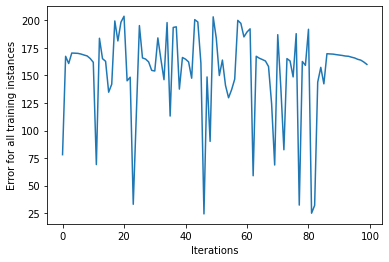

In [12]:

board_size=100
#You should add dataset to train for this
input_vectors = []

targets = []

for i in range(100):
    for j in range(7):
        input_vectors.append([i,j])
        score = calcScore(i,j,1,board_size)
        targets.append(score)

input_vectors = np.array(input_vectors)
targets = np.array(targets)

learning_rate = 0.03

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")



### predict the Score (risk/reward)

paramter : cur_pos , dice

In [13]:
def predictScore(cur_pos,dice):
    
    return neural_network.predict([cur_pos,dice])

In [14]:
def predictDiceValue(pos,Dice_range):
    res = -1
    max_score = -10
    
    for i in range(Dice_range + 1):
        score = predictScore(pos,i)
        print(i)
        print(score)
        if(score > max_score) :
            res = i
            max_score = score
            

    return res

In [16]:


def welcome_msg():
    msg = """
    Welcome to the Smart Snake and Ladder Game.
    
    Rules:
      1. Initally both the players are at starting position i.e. 0. 
         Take it in turns to roll the dice. 
         Move forward the number of spaces shown on the dice.
      2. If you lands at the bottom of a ladder, you can move up to the top of the ladder.
      3. If you lands on the head of a snake, you must slide down to the bottom of the snake.
      4. The first player to get to the FINAL position is the winner.
      5. Hit enter to roll the dice.
    
    """
    print(msg)


def get_player_names(algo):
    player1_name = "AI"
    
    player2_name = None
    while not player2_name:
        player2_name = input("Please enter a valid name for second player: ").strip()

    print("\nMatch will be played between '" + player1_name + "' and '" + player2_name + "'\n")
    
    
    print("Here Player 1 use "+algo+" \n")
    print("Player 2 will try to beat the Algorithm :D\n")
    print("Game started\n")
    print("*" * 30)
    print("*" * 30)
    return player1_name, player2_name


def get_dice_value():
    time.sleep(SLEEP_BETWEEN_ACTIONS)
    dice_value = random.randint(1, DICE_FACE)
    print("Its a " + str(dice_value))
    return dice_value


def got_snake_bite(old_value, current_value, player_name):
    print("\n" + random.choice(snake_bite).upper() + " ~~~~~~~~>")
    print("\n" +"OOPS!"+ player_name + " got a snake bite. Down from " + str(old_value) + " to " + str(current_value))
    return HTML('<img src="snake2.gif">')

def got_ladder_jump(old_value, current_value, player_name):
    print("\n" + random.choice(ladder_jump).upper() + " ########")
    print("\n" + player_name + " climbed the ladder from " + str(old_value) + " to " + str(current_value))


def snake_ladder(player_name, current_value, dice_value,board_size):
    if board_size == 75:
        snakes = snakes_75
        ladders = ladders_75
    elif board_size == 100:
        snakes = snakes_100
        ladders = ladders_100
    else:
        snakes = snakes_200
        ladders = ladders_200
    time.sleep(SLEEP_BETWEEN_ACTIONS)
    old_value = current_value
    current_value = current_value + dice_value

    if current_value > MAX_VAL:
        print("You need " + str(MAX_VAL - old_value) + " to win this game. Keep trying.")
        return old_value

    print("\n" + player_name + " moved from " + str(old_value) + " to " + str(current_value))
    if current_value in snakes:
        final_value = snakes_.get(current_value)
        got_snake_bite(current_value, final_value, player_name)

    elif current_value in ladders:
        final_value = ladders.get(current_value)
        got_ladder_jump(current_value, final_value, player_name)

    else:
        final_value = current_value

    return final_value


def check_win(player_name, position):
    time.sleep(SLEEP_BETWEEN_ACTIONS)
    if MAX_VAL == position:
        print("\n\n\nThats it.\n\n" + player_name + " won the game.")
        print("Congratulations " + player_name)
        print("\nThank you for playing the game.")
        sys.exit(1)


def start():
    welcome_msg()
    time.sleep(SLEEP_BETWEEN_ACTIONS)
    print("Select which Algorithm to use \n 1. Tree Based \n 2. Neural Network")
    game_algo = int(input("Please Select between 1 and 2"))
    if game_algo==1:
        algor = "Tree Based AI"
    else: 
        algor = "Neural Network"
    player1_name, player2_name = get_player_names(algor)
    time.sleep(SLEEP_BETWEEN_ACTIONS)

    player1_current_position = 0
    player2_current_position = 0
    print("Heyy select a board size to play between 75,100 and 200")
    time.sleep(SLEEP_BETWEEN_ACTIONS)
    board_input = input("Select a board size")

    while True:
        
        time.sleep(SLEEP_BETWEEN_ACTIONS)
        print("The AI is all set to play against you and is hitting it's dice")
        print("\nRolling dice...")
        dice_value = get_dice_value()
        print("AI rolled a Dice Value of",dice_value)
        print("Selecting value between 0 to ",dice_value)
        
        #dice_input_1 = predictDiceValue(player1_current_position,dice_value)
        if game_algo == 1:
            dice_input_1 = calcDiceValue(player1_current_position,dice_value,int(board_input))
        else:
            dice_input_1 = predictDiceValue(player1_current_position,dice_value,int(board_input))
        time.sleep(SLEEP_BETWEEN_ACTIONS)
        print(player1_name + " moving....")
        player1_current_position = snake_ladder(player1_name, player1_current_position, dice_input_1,board_input)
        check_win(player1_name, player1_current_position)

        input_2 = input("\n" + player2_name + ": " + random.choice(player_turn_text) + " Hit the enter to roll dice: ")
        print("\nRolling dice...")
        dice_value = get_dice_value()
        print("Select a value between 0 to ",dice_value)
        dice_input_2 =int(input("\n" + player1_name + ": " + random.choice(player_turn_text) + " select a value: "))
        dice_2 = dice_input_2
        
        time.sleep(SLEEP_BETWEEN_ACTIONS)
        print(player2_name + " moving....")
        player2_current_position = snake_ladder(player2_name, player2_current_position, dice_2,board_input)
        check_win(player2_name, player2_current_position)



### Play Game

In [ ]:
if __name__ == "__main__":
    start()


    Welcome to the Smart Snake and Ladder Game.
    
    Rules:
      1. Initally both the players are at starting position i.e. 0. 
         Take it in turns to roll the dice. 
         Move forward the number of spaces shown on the dice.
      2. If you lands at the bottom of a ladder, you can move up to the top of the ladder.
      3. If you lands on the head of a snake, you must slide down to the bottom of the snake.
      4. The first player to get to the FINAL position is the winner.
      5. Hit enter to roll the dice.
    
    
Select which Algorithm to use 
 1. Tree Based 
 2. Neural Network
Please Select between 1 and 21
Please enter a valid name for second player: Anusha

Match will be played between 'AI' and 'Anusha'

Here Player 1 use Tree Based AI 

Player 2 will try to beat the Algorithm :D

Game started

******************************
******************************
Heyy select a board size to play between 75,100 and 200
Select a board size75
The AI is all set to play a